In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fenics
from nalger_helper_functions import PoissonSquaredInterpolation

In [2]:
n = 75
num_pts0 = 52

mesh = fenics.UnitSquareMesh(n, n)
V = fenics.FunctionSpace(mesh, 'CG', 2)

In [3]:
def nearest_ind(q, xx):
    return np.argmin(np.linalg.norm(q - xx, axis=1))

In [4]:
def choose_random_mesh_nodes(V, num_pts0):
    np.random.seed(0)
    xx0 = np.random.rand(num_pts0, mesh.geometric_dimension()) * 0.7 + 0.15
    coords = V.tabulate_dof_coordinates()
    closest_inds = []
    for k in range(xx0.shape[0]):
        closest_inds.append(nearest_ind(xx0[k, :], coords))

    point_inds_ii = np.unique(closest_inds)
    xx = coords[point_inds_ii, :]
    num_pts = xx.shape[0]
    return point_inds_ii, xx, num_pts

In [5]:
point_inds_ii, xx, num_pts = choose_random_mesh_nodes(V, num_pts0)
points = [xx[k,:] for k in range(xx.shape[0])]
y = np.random.randn(num_pts)

In [6]:
PSI = PoissonSquaredInterpolation(V, initial_points=points)

In [7]:
y = np.random.randn(PSI.num_pts)
u = PSI.interpolate_values(y)

In [8]:
u_fct = fenics.Function(V)
u_fct.vector().set_local(u)

In [9]:
def plot_kth_weighting_function(k):
    wk = fenics.Function(V)
    wk.vector().set_local(PSI.weighting_functions[k])
    fenics.plot(wk)
    for k in range(xx.shape[0]):
        plt.plot(xx[k, 0], xx[k, 1], '.r')

Text(0.5, 1.0, 'w44')

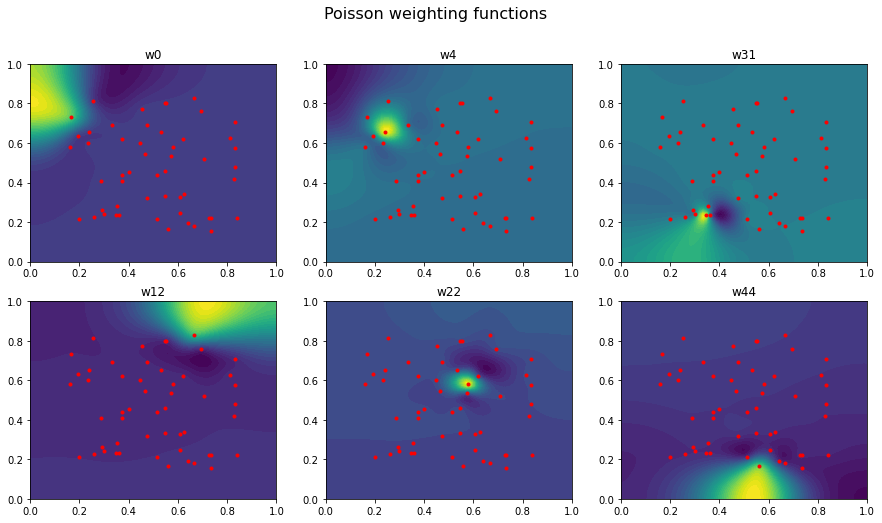

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Poisson weighting functions', fontsize=16)

kk = [0,4,31,12,22,44]
# kk = np.array(kk)*10

plt.sca(axes[0,0])
k=kk[0]
plot_kth_weighting_function(k)
plt.title('w'+str(k))

plt.sca(axes[0,1])
k=kk[1]
plot_kth_weighting_function(k)
plt.title('w'+str(k))

plt.sca(axes[0,2])
k=kk[2]
plot_kth_weighting_function(k)
plt.title('w'+str(k))

plt.sca(axes[1,0])
k=kk[3]
plot_kth_weighting_function(k)
plt.title('w'+str(k))

plt.sca(axes[1,1])
k=kk[4]
plot_kth_weighting_function(k)
plt.title('w'+str(k))

plt.sca(axes[1,2])
k=kk[5]
plot_kth_weighting_function(k)
plt.title('w'+str(k))

Text(0.5, 1.0, 'interpolation of random data')

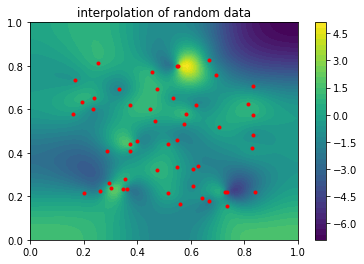

In [11]:
plt.figure()
c = fenics.plot(u_fct)
for k in range(xx.shape[0]):
    plt.plot(xx[k, 0], xx[k, 1], '.r')
plt.colorbar(c)
plt.title('interpolation of random data')